In [3]:
"""
Utilities to query the dataset
"""
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [4]:
def load_dataset(pkl_file_name):
    # Load a saved dataset into memory
    with open(pkl_file_name,'rb') as f:
        my_dataset = pickle.load(f)
    return(my_dataset)

In [5]:
def draw_skeleton(W,H,coords):
    img = np.zeros((W,H,3), np.uint8)
    joint_pairs = [[0, 1], [1, 3], [0, 2], [2, 4],
                   [5, 6], [5, 7], [7, 9], [6, 8], [8, 10],
                   [5, 11], [6, 12], [11, 12],
                   [11, 13], [12, 14], [13, 15], [14, 16]] 
    colormap_index = np.linspace(0, 1, len(joint_pairs))
    pts = coords
    for cm_ind, jp in zip(colormap_index, joint_pairs):
        cm_color = tuple([int(x * 255) for x in plt.cm.cool(cm_ind)[:3]]) 
        pt1 = (int(pts[jp, 0][0]), int(pts[jp, 1][0]))
        pt2 = (int(pts[jp, 0][1]), int(pts[jp, 1][1]))
        cv2.line(img, pt1, pt2, cm_color, 3)
    return(img)

In [6]:
def get_skeleton_frame(gymn_dataset,clip_ID,frame_number):
    coords = gymn_dataset["Skeletons"][clip_ID][frame_number]
    img = draw_skeleton(800,600,coords)
    return(img)

In [5]:
def show_skeleton_movie(gymn_dataset,clip_ID):
    #not working 
    sk_list = gymn_dataset["Skeletons"][clip_ID]
    fig = plt.figure()
    ims = []
    for sk_frame in sk_list:
        if type(sk_frame)==np.ndarray:
            skeleton_img = draw_skeleton(800,600,sk_frame)
            im = plt.imshow(skeleton_img,animated=True)
            ims.append([im])
    ani = animation.ArtistAnimation(fig,ims,interval=500,blit=True,repeat_delay=1000)            
    plt.show()
    return(ani)

In [7]:
my_dataset = load_dataset('GymnData.pickle')

In [8]:
my_dataset['ClipList'].head()

,PoseClipId,FileName,VideoSourceId,ExerciseType,ClipNumber,SampleType,CroppedPerson,ExtraPerson,NumberOfFrames
0,42980195,011_SeatedInAndOuts_002_BAD.mp4,011,SeatedInAndOuts,002,BAD,0,0,13
1,32715923,010_RussianTwist_002_GOOD.mp4,010,RussianTwist,002,GOOD,0,0,10
2,83772868,003_ChairSitUps_003_GOOD.mp4,003,ChairSitUps,003,GOOD,18,0,21
3,51335908,001_BulgarianSplitSquat_002_GOOD.mp4,001,BulgarianSplitSquat,002,GOOD,0,0,16
4,63419,008_PlankShoulderTaps_003_GOOD.mp4,008,PlankShoulderTaps,003,GOOD,15,0,20


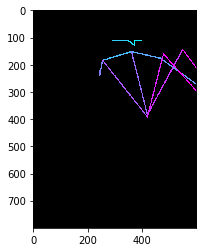

In [13]:
# Example how to show a frame from a clip
img = get_skeleton_frame(my_dataset,42980195,0)
plt.imshow(img)
plt.show()

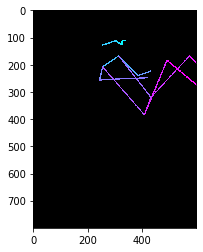

In [14]:
# Example how to show a frame from a clip
img = get_skeleton_frame(my_dataset,42980195,1)
plt.imshow(img)
plt.show()

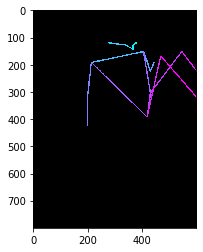

In [15]:
# Example how to show a frame from a clip
img = get_skeleton_frame(my_dataset,42980195,2)
plt.imshow(img)
plt.show()